In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import norm
from math import *
plt.style.use('default')
np.random.seed(9190)

### Simulate Standard Brownian Motion on [0,T]:

In [38]:
#Number of steps
N = 1000
# Time length:
T=10
#Time Intervals:
dt = T/N
# Draw N iid standard normals N(0,1) and scale by sqrt(dt):
Z = np.random.normal(0,1,N) * sqrt(dt)
#Initiate from 0
Z[0] = 0
#Compute the Browinian Path:
W = np.cumsum(Z)

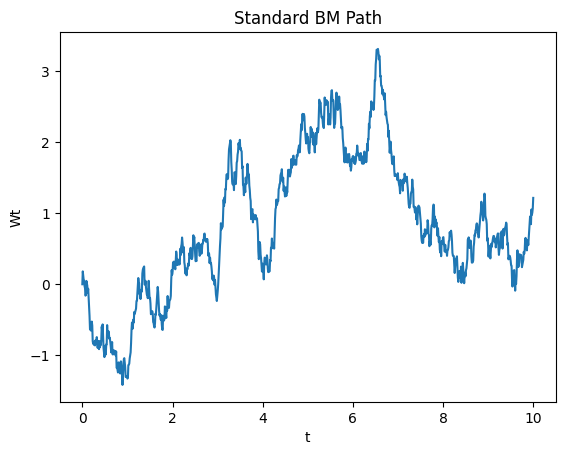

In [39]:
t=np.linspace(0, T, N)
plt.plot(t,W)
plt.title("Standard BM Path")
plt.ylabel("Wt")
plt.xlabel("t")
plt.show()

### Simulate M Standard Brownian Paths:

In [40]:
#Number of steps
N = 1000
#Number of Paths
M = 100
#Generate standard normal paths and scale by sqrt(dt)
dt = T / N
Z = np.random.normal(0, 1, (M, N)) * sqrt(dt)
#Initiate all the paths from 0
Z[:, 0] = 0
# Compute the Brownian Paths:
W = np.cumsum(Z, axis=1)

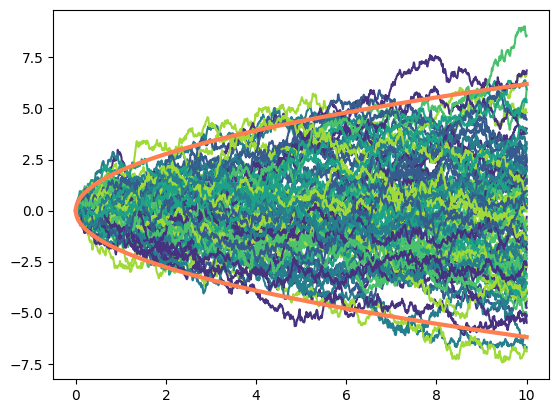

In [41]:
t = np.linspace(0, T, N)
#Transpose the paths so that W and t have the same first dimension= Number of timesteps N
paths = W.T
sns.set_palette("viridis")
plt.plot(t, paths)
#Plot 95% Confidence Intervals:
upper = 1.96 * np.sqrt(t)
lower = -1.96 * np.sqrt(t)
plt.plot(t, upper, linewidth=3, color="coral")
plt.plot(t, lower, linewidth=3, color="coral")
plt.show()

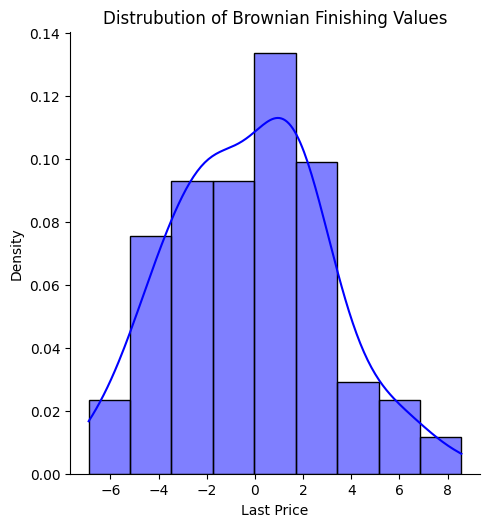

In [42]:
last_values = W[:, -1]
sns.displot(last_values, kde=True, color="blue", stat="density")
plt.title("Distrubution of Brownian Finishing Values")
plt.xlabel("Last Price")
plt.show()

### Simulate Geometric Brownian Motion:

$S_t=S_0e^{(\mu-0.5\sigma^2)t+\sigma W_t}$ where $W_t\sim N(0,t),\;W_t=\sqrt{t}*Z \;where\;Z\sim N(0,1)$ and so to simulate the GBM by Euler discretization, we first generate the whole Standard BM Path, then add the drift, scale by the volatility and finally exponentiate.

Also, note that $S_{t+1}=S_te^{(\mu-0.5\sigma^2)\Delta t+\sigma \Delta W_t}=S_te^{(\mu-0.5\sigma^2)\Delta t+\sigma \sqrt{\Delta t}}Z$

In [43]:
#Let:
N = 1000 #Time steps
S0 = 100
mu = 0.05
sigma = 0.2
#Generate N standard Normals:
Z = np.random.normal(0,1,N)
Z[0]=0
#Compute the Standard Brownian Path:
W = np.cumsum(Z) * sqrt(dt)
ti = np.linspace(0, T, N)
#Add the drift, scale by volatility and exponentiate:
S = S0 * np.exp((mu - 0.5 * (sigma ** 2)) * ti + sigma * W)

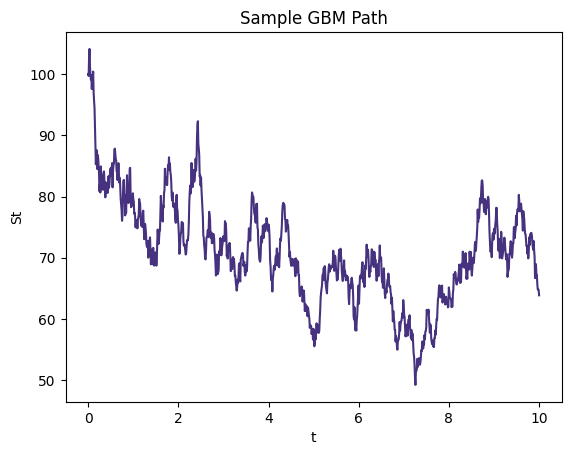

In [44]:
plt.plot(ti, S)
plt.ylabel("St")
plt.xlabel("t")
plt.title("Sample GBM Path")
plt.show()

### Simulate M GBM Paths:

In [45]:
N = 1000 # Number of time steps
M = 1000 # Number of paths
T = 10 # Time length
# Generate M*N Standard Normals:
Z = np.random.normal(0, 1, (M, N))
dt = T / N
ti = np.linspace(0, T, N)
# Generate the standard BM paths:
W = np.cumsum(Z, axis=1) * sqrt(dt)
S = S0 * np.exp((mu - 0.5 * (sigma ** 2)) * ti + sigma * W)

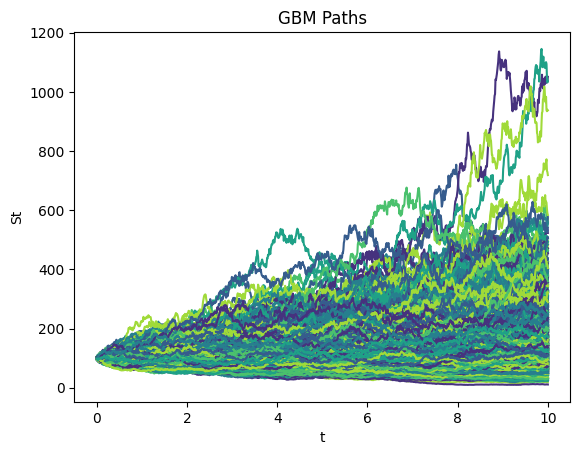

In [46]:
gbm_paths = S.T
plt.plot(ti,gbm_paths)
plt.title("GBM Paths")
plt.ylabel("St")
plt.xlabel("t")
plt.show()

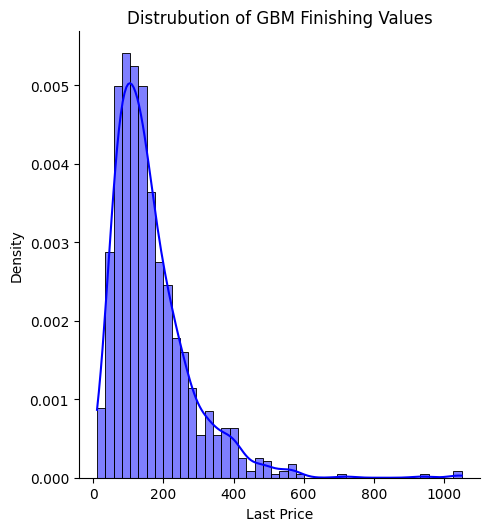

In [47]:
last_prices = S[:, -1]
sns.displot(last_prices, kde=True, stat="density", color="blue")
plt.title("Distrubution of GBM Finishing Values")
plt.xlabel("Last Price")
plt.show()

### Finally, from Ito's lemma we have that:
$ln(\frac{S_t}{S_o})\sim N[(\mu-0.5\sigma^2)t,\sigma^2t]$ 

Below, we examine empirically this theoretical result:

In [48]:
# Compute the finishing log returns
log_r = np.log(S[:, -1] / S[:, 0])
# Compute the location and the scale of their theoretical normal distributions
mu_f = (mu - 0.5 * (sigma ** 2)) * T
sigma_f = sigma * sqrt(T)
print(mu_f,sigma_f)

0.3 0.632455532033676


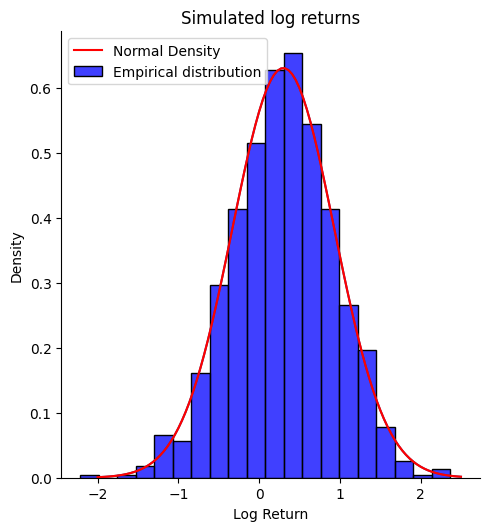

In [49]:
#Examine the proximity of the exmpirical distribution to the theoretical distributions:
#Plot the empircal distribution
sns.displot(log_r, bins=20, stat="density", label="Empirical distribution", color="blue")
#Plot the Empriical distribution
dist = norm(loc=mu_f, scale=sigma_f)
x = np.linspace(-2, 2.5, 100)
y = dist.pdf(x)
plt.plot(x, y)
plt.plot(x, y, color="red", label="Normal Density")
plt.title("Simulated log returns")
plt.xlabel("Log Return")
plt.legend()
plt.show()

In [50]:
#Check the MLE estimation of the distribution parameters:
(mu,sigma) = stats.norm.fit(log_r)
print(f"The MLE estimations are Mean {round(mu,3)} and standard deviation {round(sigma,3)}")
print(f"The actual parameters are Mean: {round(mu_f, 3)} and standard deviation {round(sigma_f, 3)}")

The MLE estimations are Mean 0.305 and standard deviation 0.629
The actual parameters are Mean: 0.3 and standard deviation 0.632


In [15]:
#Unoacking parameters:
params=stats.norm.fit(log_r)
pdf_values = norm.pdf(log_r, *params)